In [1]:
# TODO: add the names of the holidays, the additive vs multiplicative, prior scales, valildate inputs, country holidays, add the comments, making it compatible with events
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet as Bifrost
from fbprophet import Prophet

In [2]:
# create the dataframe for the holidays

playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')
m = Bifrost(
    n_lags=0,
    seasonality_mode='additive',
    yearly_seasonality=3,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=holidays,
    verbose=True
)
m.fit(df)

# m = Prophet(holidays=holidays)
# fit = m.fit(df)

AttrDict({'t_start': Timestamp('2007-12-10 00:00:00'), 't_scale': Timedelta('2963 days 00:00:00'), 'y_shift': 8.138957937650906, 'y_scale': 0.8458113663030432})
AttrDict({'type': 'fourier', 'mode': 'additive', 'periods': OrderedDict([('yearly', AttrDict({'resolution': 3, 'period': 365.25, 'arg': 3}))])})
TimeNet(
  (season_params): ParameterDict(  (yearly): Parameter containing: [torch.FloatTensor of size 6])
)
model_complexity 3.1780538303479453
Tabularized inputs shapes:
     time (2905, 1)
     yearly seasonality (2905, 1, 6)
     holidays (2905, 1, 4)
1. Epoch Avg Loss:       0.29
2. Epoch Avg Loss:       0.19
Train Time:   0.2637
Total Number of Batches:  46


Tabularized inputs shapes:
     time (2965, 1)
     yearly seasonality (2965, 1, 6)
     holidays (2965, 1, 4)
Tabularized inputs shapes:
     time (2965, 1)
     yearly seasonality (2965, 1, 6)
     holidays (2965, 1, 4)


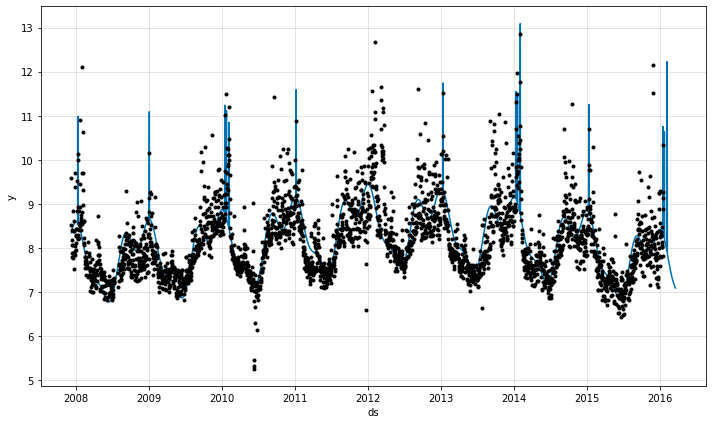

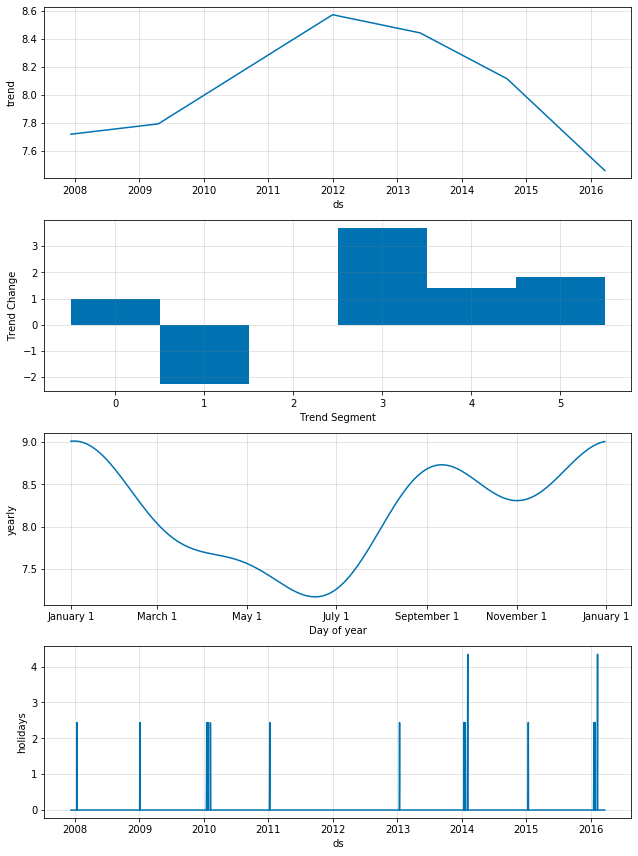

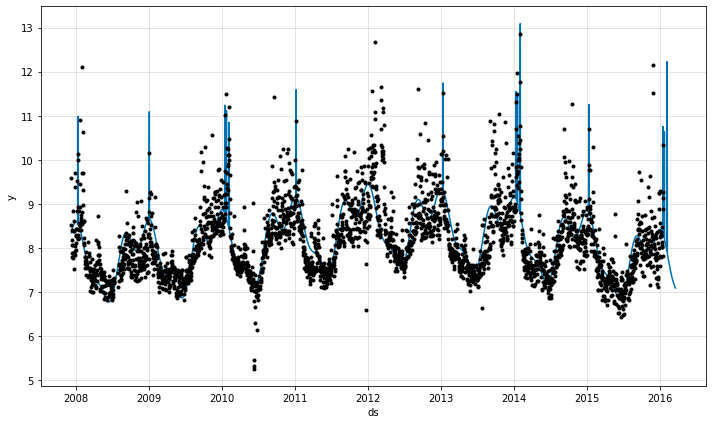

In [3]:
# future = m.make_future_dataframe(periods=60)
# forecast = m.predict(future)

forecast = m.predict(future_periods=60)
m.plot_components(forecast)
m.plot(forecast)
